# Seminar 11 - Power

In [103]:
library("dplyr")
set.seed(1234)

## Question 1
Power of a hypothesis test is equal to the probability of rejection of the null hypothesis when the alternative hypothesis is true. Power is always computed against a specific alternative which depends on a chosen effect size.

In [108]:
sample_hypothesis <- function(N, ssize, theta.null, theta.alth, sign = 0.05) {
    hypo <- c()
    for (i in c(0:N)) {
        set.seed(1234 + i)
        null <- rnorm(ssize, mean = theta.null[1], sd = theta.null[2])
        alth <- rnorm(ssize, mean = theta.alth[1], sd = theta.alth[2])
        re <- t.test(null, alth, 
                     conf.level = 1 - signl, 
                     var.equal = theta.null[2] == theta.alth[2])
        
        if (re$p.value >= signl) {
            hypo <- c(hypo, FALSE) # accept null hypothesis
        } else {
            hypo <- c(hypo, TRUE) # reject null hypothesis
        }
    }
    
    hypo
}

In [109]:
re <- sample_hypothesis(N = 10000, ssize = 8, theta.null = c(0,1), theta.alth = c(2,1))
length(which(re == TRUE)) / 10000

[1] 0.9619

## Question 2
Choose a range of sample sizes and, using the function in Q1.1 to find the minimal sample size
which leads to the 80 percent power. Make a plot illustrating your explorations.

In [123]:
N_Sim <- 10000
ssizes <- c(2:12)

In [138]:
powers <- c()
for (size in ssizes) {
    re <- sample_hypothesis(N = N_Sim, 
                      ssize = size, 
                      theta.null = c(0,1), 
                      theta.alth = c(2,1))
    
    pw <- length(which(re == TRUE)) / N_Sim
    powers <- c(powers, pw)
    
    if (pw >= 0.8) {
        print(size)
    }
}

[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12


integer(0)

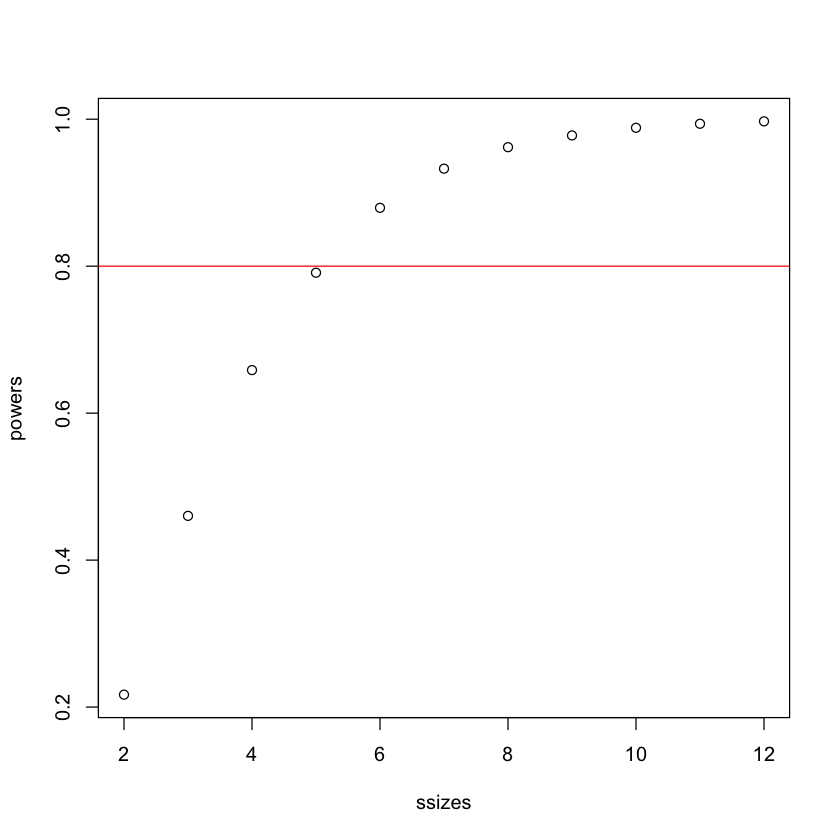

In [140]:
plot(powers ~ ssizes) + abline(h = 0.8, col = "red")

## Question 3
Re-use your R functions to explore different effect sizes which would lead to 80 percent power
given a fixed sample size. Make a plot illustrating your explorations.

In [141]:
N_Sim <- 10000
effects <- c(0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5)

In [148]:
powers_t <- c()
for (eff in effects) {
    powers <- c()
    for (size in ssizes) {
        re <- sample_hypothesis(N = N_Sim, 
                          ssize = size, 
                          theta.null = c(0,1), 
                          theta.alth = c(0 + eff,1))
        
        pw <- length(which(re == TRUE)) / N_Sim
        powers <- c(powers, pw)
    }
    powers_t <- c(powers_t, powers)
}

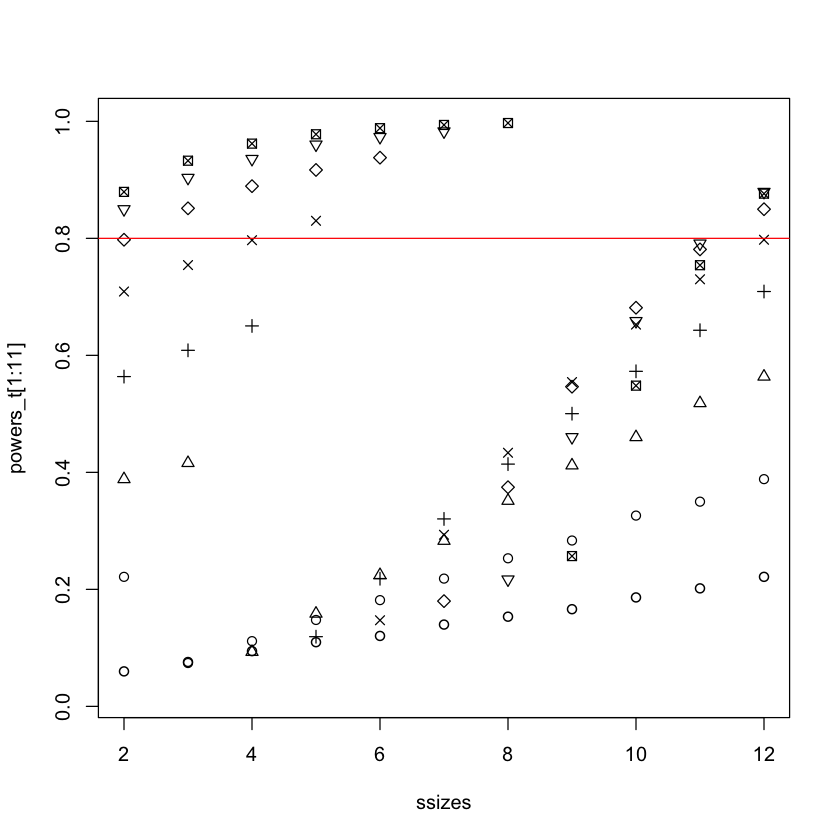

In [195]:
plot(ssizes, powers_t[1:11], ylim=c(0.02, 1), lwd=1.2)
points(ssizes, powers_t[11:21], pch = 1)
points(ssizes, powers_t[21:31], pch = 2)
points(ssizes, powers_t[31:41], pch = 3)
points(ssizes, powers_t[41:51], pch = 4)
points(ssizes, powers_t[51:61], pch = 5)
points(ssizes, powers_t[61:71], pch = 6)
points(ssizes, powers_t[71:81], pch = 7) 
abline(h = 0.8, col = "red")

# Practice Test

In [203]:
library("pwr")

## Question 1

According to Robert Koch Institute, 10828 women and 8750 men in Dresden had contracted COVID-19 by January 22th, 202. Of those, 291 women and 288 men died.

Based on this information, answer the following questions.

### Q1.1
Use R-software to test whether the data set provides evidence that, under 5% significance level (two-sided), the death rates of men and women in Dresden are not the same. If it does, insert 1, otherwise, insert 0:

### Q1.2
The observed death rates of women and men are approximately 2.7% and 3.3%.
Hypothetically, we may want to show that the disease is more deadly for men than for women. Use the R-library pwr  to find out the minimal sample size required to achieve the 90% power in one-sided test (5% significance) of the difference in proportions of 2.7% and 3.3%. Assume for simplicity that two groups have equal sample sizes. Give the answer here:  338996 



In [205]:
e1 = 291/10828
e2 = 288/8750

In [230]:
pwr.2p.test(h = e1-e2,power=0.8, sig.level=0.05, alternative="less")


     Difference of proportion power calculation for binomial distribution (arcsine transformation) 

              h = -0.006039517
              n = 338995.4
      sig.level = 0.05
          power = 0.8
    alternative = less

NOTE: same sample sizes


In [227]:
pwr.t.test(d = e1-e2, power = 0.9, sig.level = 0.05, alternative = "less", type = "two.sample")


     Two-sample t test power calculation 

              n = 469564.4
              d = -0.006039517
      sig.level = 0.05
          power = 0.9
    alternative = less

NOTE: n is number in *each* group


## Question 2

Here is a sample of reproduction numbers estimated for ten randomly selected European countries on  January 14th, 2021:

0.92, 0.85, 1.46, 0.98, 0.8, 0.55, 1.02, 0.87, 1.04, 1.24

Assume that the data come from a normal distribution and answer the following questions.

### Q2.1
Does the data set provide evidence that that disease is still actively spreading (R > 1)? Use the most appropriated statistical test and report its p-value:
(round to two decimal places).


## Q 2.2
Points: 2
The observed effect size, computed as the difference between means, divided by the sample standard deviation, is equal to = 
(round to two decimal places).

 

Use the R library pwr, to compute the minimal sample size needed to achieve the 80% power in detecting this effect size (rounded to two decimal places) using the two-sided t test, under 5% significance level. Give your answer here:  



In [214]:
nums <- c(0.92, 0.85, 1.46, 0.98, 0.8, 0.55, 1.02, 0.87, 1.04, 1.24)
samp <- rnorm(length(nums), mean = 0, sd = 1)

In [218]:
t.test(nums, samp)


	Welch Two Sample t-test

data:  nums and samp
t = 3.3741, df = 10.518, p-value = 0.006597
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3250545 1.5647516
sample estimates:
 mean of x  mean of y 
0.97300000 0.02809692 


In [219]:
(mean(nums) - mean(samp)) / sqrt(var(nums))

[1] 3.813284

In [225]:
pwr.t.test(d = (mean(nums) - mean(samp)) / sqrt(var(nums)), 
           power = 0.8, 
           sig.level = 0.05, 
           alternative = "greater", 
           type = "two.sample")


     Two-sample t test power calculation 

              n = 2.051989
              d = 3.813284
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group
